In [2]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

In [3]:
ls

 Volume in drive C is Windows
 Volume Serial Number is CEEB-BA01

 Directory of C:\Users\Srushti M Prakash\Documents\Data Science Somenath

30-01-2023  09:45    <DIR>          .
28-01-2023  17:37    <DIR>          ..
30-01-2023  09:41    <DIR>          .ipynb_checkpoints
27-01-2023  18:57            42,406 Basics of Python.ipynb
28-01-2023  16:35             1,336 mtcars-Copy1.csv
28-01-2023  17:31            11,206 Numpy.ipynb
30-01-2023  09:45               996 Untitled.ipynb
30-01-2023  09:15             1,170 WC_AT.csv
               5 File(s)         57,114 bytes
               3 Dir(s)  161,404,628,992 bytes free


(109, 2) Shape of Data Frame
   Waist     AT
0  74.75  25.72
1  72.60  25.89
2  81.80  42.60
3  83.95  42.80
4  74.65  29.84
5  71.85  21.68
6  80.90  29.08
7  83.40  32.98
8  63.50  11.44
9  73.20  32.22


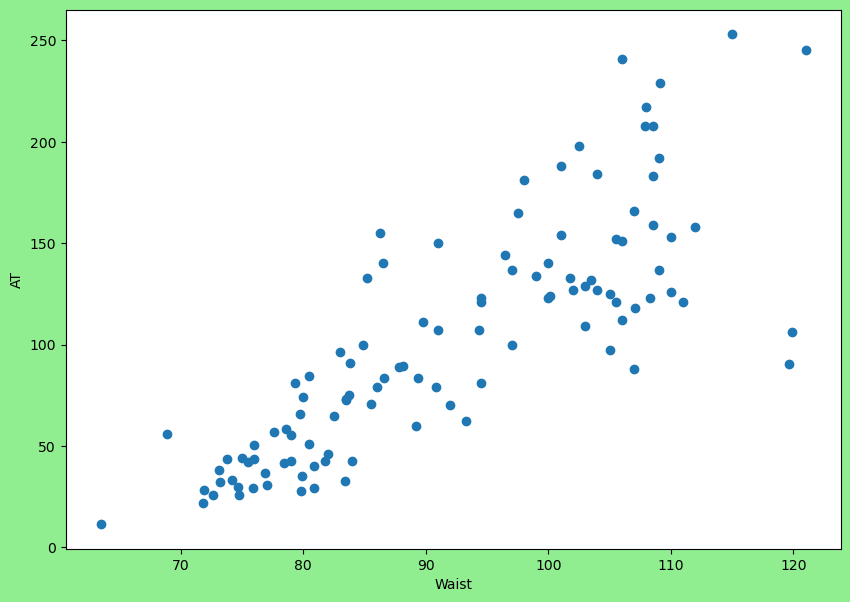

In [6]:
wcat = pd.read_csv("WC_AT.csv")

print(wcat.shape,"Shape of Data Frame")
print("="*30)

print(wcat.head(10))

plt.figure(figsize = (10,7),facecolor="lightgreen")
plt.scatter(wcat.Waist,wcat.AT)
plt.xlabel("Waist");
plt.ylabel("AT")
#print(wcat.AT)
plt.show()

In [7]:
wcat.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


In [8]:
wcat.shape

(109, 2)

# creating model with SKLEARN

# Model with statsmodel


In [9]:
#this is the preferred model

In [11]:
wcat

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [13]:
first_model = smf.ols("AT~Waist",data=wcat).fit()
# pred_statsmodel = first_model.predict(wcat["Waist"])
# r2_score(wcat["AT"],pred_train_lm)

In [17]:
first_model.params

# at -3.45*wt -215.98
3.45*80 -215.98

60.02000000000001

In [18]:
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           1.62e-27
Time:                        11:20:22   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

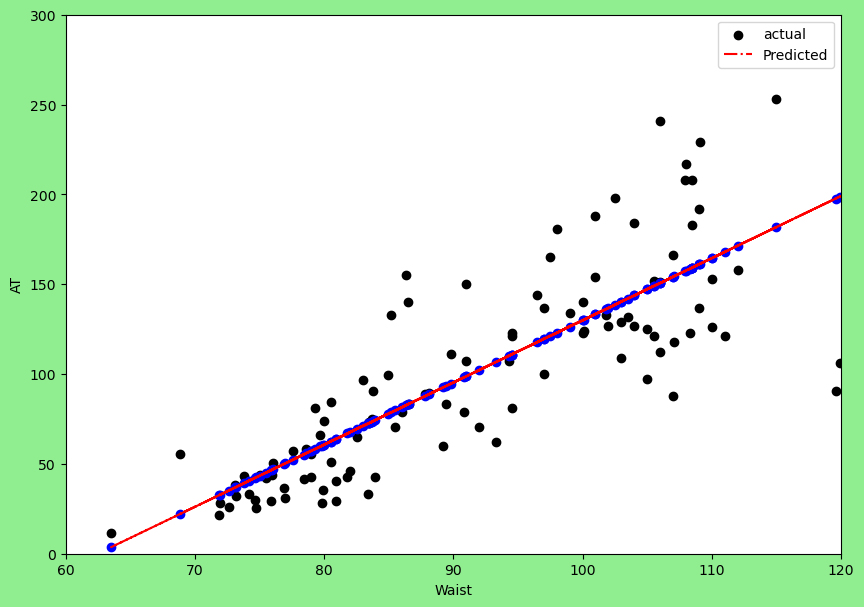

In [28]:
plt.figure(figsize = (10,7),facecolor = "Lightgreen")
plt.scatter(wcat.Waist,(wcat.AT),color = "Black",label = "actual");
#black scatter is the actual data points
plt.plot(wcat.Waist,first_model.predict(wcat["Waist"]),label = "Predicted",color = "red",linestyle="-.");
plt.scatter(wcat.Waist,first_model.predict(wcat["Waist"]),color = "blue")
#blue scatter precicted
plt.xlabel("Waist")
plt.ylabel("AT")
plt.xlim(60,120)
plt.ylim(0,+300)
#print(wcat.AT)
plt.legend(loc="best")
plt.show()

In [31]:
#to find error
first_model.resid

0     -16.848252
1      -9.241704
2     -24.353210
3     -31.589758
4     -12.382366
         ...    
104    -6.250337
105   -44.530093
106    -3.130398
107    50.770560
108    48.695244
Length: 109, dtype: float64

# Transformation 

In [ ]:
#AT = a*WC+b
#Transformations can be done using 
#AT = a*log(WC)+b
#At = a*exp(WC)+b
#AT = a1*WC + a2*WC +b

In [34]:
model2 = smf.ols('AT~np.log(Waist)',data=wcat).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     222.6
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           6.80e-28
Time:                        12:32:01   Log-Likelihood:                -534.11
No. Observations:                 109   AIC:                             1072.
Df Residuals:                     107   BIC:                             1078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1328.3420     95.923    -13.848      0.000   -1518.498   -1138.186
np.log(Waist)   317.1356     21.258     14.918      0.000     274.994     359.277
==============================================================================
Omnibus:                        3.317   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                2.908
Skew:                           0.235   Prob(JB):                        0.234
Kurtosis:                       3.647   Cond. No.                         145.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
#0.670--->0.675 small changes
#more transformation
model3 = smf.ols('np.log(AT)~Waist',data=wcat).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     258.3
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           2.68e-30
Time:                        12:39:05   Log-Likelihood:                -40.123
No. Observations:                 109   AIC:                             84.25
Df Residuals:                     107   BIC:                             89.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7410      0.233      3.185      0.002       0.280       1.202
Waist          0.0403      0.003     16.073      0.000       0.035       0.045
==============================================================================
Omnibus:                        2.604   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                2.117
Skew:                          -0.329   Prob(JB):                        0.347
Kurtosis:                       3.182   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
wcat["Waist_Sq"] = wcat.Waist**2
model_quad = smf.ols("np.log(AT)~Waist + Waist_Sq",data = wcat).fit()
model_quad.summary()
#model_quad.params

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     186.8
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           1.80e-35
Time:                        12:45:52   Log-Likelihood:                -24.779
No. Observations:                 109   AIC:                             55.56
Df Residuals:                     106   BIC:                             63.63
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.8241      1.473     -5.312      0.000     -10.744      -4.904
Waist          0.2289      0.032      7.107      0.000       0.165       0.293
Waist_Sq      -0.0010      0.000     -5.871      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        0.325   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.271
Skew:                           0.119   Prob(JB):                        0.873
Kurtosis:                       2.949   Cond. No.                     4.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""